# ARIMA Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset
df = pd.read_excel("Lecture 2_Data.xls")

In [4]:
df.head()
df.tail()

,Year,MAC,TUR,BMS,EXP,IMP,GDP,IIP
207,August,3.82479,1.76914,-0.12172,0.09169,0.29982,0.0794,1.06187
208,September,3.81191,1.77250,-0.12521,0.13998,0.31464,0.0794,1.22523
209,October,3.82704,1.67068,-0.12377,0.09666,0.33970,0.0794,1.05492
210,November,3.78038,1.66904,-0.12592,0.09901,0.32291,0.0794,1.31831
211,December,3.74968,1.61818,-0.11966,0.14611,0.34168,0.0794,1.35491


In [5]:
df.describe()

,MAC,TUR,BMS,EXP,IMP,GDP,IIP
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.638189,2.086645,-0.231248,-0.073721,0.047141,0.012583,1.162602
std,0.206816,0.280651,0.085211,0.110174,0.159548,0.109454,0.206934
min,3.280340,1.229030,-0.370290,-0.256080,-0.227970,-0.204060,-0.059410
25%,3.486965,1.944568,-0.313480,-0.171643,-0.089095,-0.037520,1.126227
50%,3.580850,2.098090,-0.203585,-0.088850,-0.008025,0.047700,1.187990
75%,3.854095,2.265703,-0.163205,0.009917,0.198442,0.087220,1.265635
max,4.131340,2.713720,-0.109780,0.204590,0.397750,0.161080,1.476260


In [6]:
df.columns

Index(['Year', 'MAC', 'TUR', 'BMS', 'EXP', 'IMP', 'GDP', 'IIP'], dtype='object')

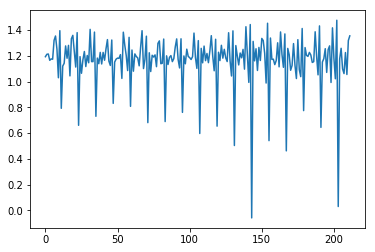

In [14]:
df['IIP'].plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
result = adfuller(df['IIP'])
result

(-2.0483192660445244,
 0.26579658905771053,
 12,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 -303.7305853595491)

In [17]:
df['First IIP'] = df['IIP'] - df['IIP'].shift(1)

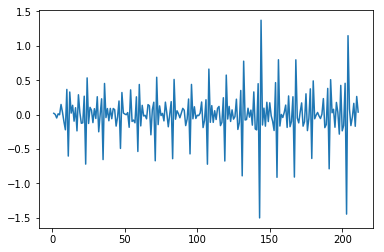

In [18]:
df['First IIP'].plot()

In [20]:
result = adfuller(df['First IIP'].dropna())
result

(-14.251480107626353,
 1.478475479395074e-26,
 11,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 -299.4279427894014)

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

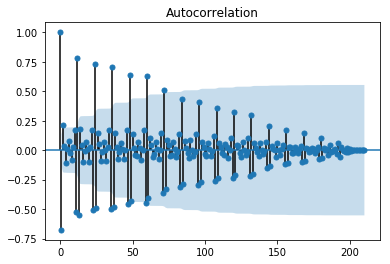

In [22]:
fig_first = plot_acf(df['First IIP'].dropna())

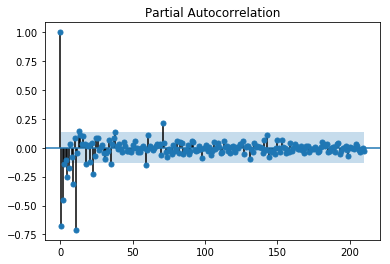

In [24]:
fig_first = plot_pacf(df['First IIP'].dropna(),method='ywmle')

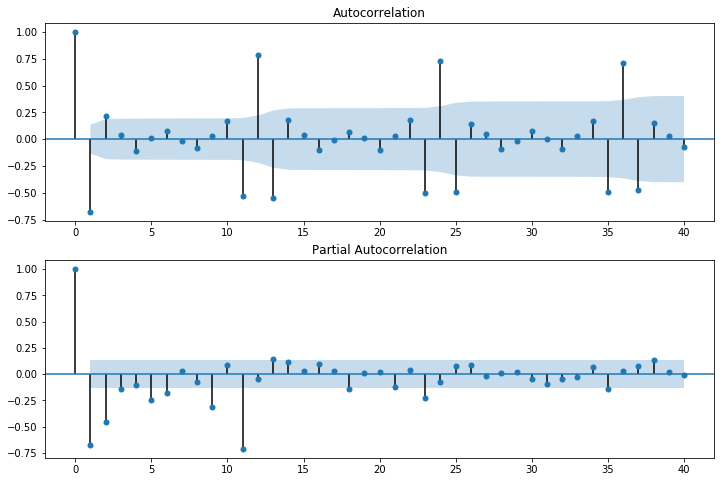

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['First IIP'].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['First IIP'].dropna(), method='ywmle', lags=40, ax=ax2)

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |  If exogenous variables are given, then the model that is fit is
 

In [115]:
model = ARIMA(df['IIP'],order=(1,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.IIP   No. Observations:                  211
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  45.350
Method:                       css-mle   S.D. of innovations              0.192
Date:                Thu, 12 Mar 2020   AIC                            -82.699
Time:                        16:52:51   BIC                            -69.292
Sample:                             1   HQIC                           -77.280
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0002      0.000     -1.266      0.207      -0.001       0.000
ar.L1.D.IIP    -0.3608      0.064     -5.626      0.000      -0.487      -0.235
ma.L1.D.IIP    -1.0000      0.012    -83.536      0.000      -1.023      -0.977
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7713           +0.0000j            2.7713            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [114]:
model = ARIMA(df['IIP'],order=(2,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.IIP   No. Observations:                  211
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  45.386
Method:                       css-mle   S.D. of innovations              0.192
Date:                Thu, 12 Mar 2020   AIC                            -80.772
Time:                        16:51:43   BIC                            -64.013
Sample:                             1   HQIC                           -73.997
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0002      0.000     -1.294      0.197      -0.001       0.000
ar.L1.D.IIP    -0.3678      0.069     -5.318      0.000      -0.503      -0.232
ar.L2.D.IIP    -0.0186      0.069     -0.270      0.788      -0.154       0.117
ma.L1.D.IIP    -1.0000      0.012    -83.431      0.000      -1.023      -0.977
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.2556           +0.0000j            3.2556            0.5000
AR.2          -16.4830           +0.0000j           16.4830            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [116]:
model = ARIMA(df['IIP'],order=(2,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.IIP   No. Observations:                  211
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  45.386
Method:                       css-mle   S.D. of innovations              0.192
Date:                Thu, 12 Mar 2020   AIC                            -80.772
Time:                        16:52:56   BIC                            -64.013
Sample:                             1   HQIC                           -73.997
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0002      0.000     -1.294      0.197      -0.001       0.000
ar.L1.D.IIP    -0.3678      0.069     -5.318      0.000      -0.503      -0.232
ar.L2.D.IIP    -0.0186      0.069     -0.270      0.788      -0.154       0.117
ma.L1.D.IIP    -1.0000      0.012    -83.431      0.000      -1.023      -0.977
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.2556           +0.0000j            3.2556            0.5000
AR.2          -16.4830           +0.0000j           16.4830            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

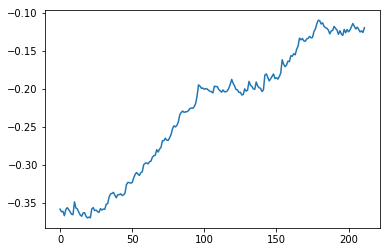

In [62]:
df['BMS'].plot()

In [58]:
df.columns

Index(['Year', 'MAC', 'TUR', 'BMS', 'EXP', 'IMP', 'GDP', 'IIP', 'First IIP'], dtype='object')

In [64]:
result = adfuller(df['BMS'])
result

(-1.4156587702172672,
 0.5747465124288732,
 12,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 -1628.1456212096527)

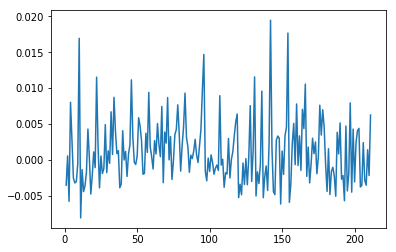

In [66]:
df['First BMS'] = df['BMS'] - df['BMS'].shift(1)
df['First BMS'].plot()

In [68]:
result = adfuller(df['First BMS'].dropna())
result

(-2.384265331136554,
 0.14622673852276963,
 11,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 -1618.3667402827684)

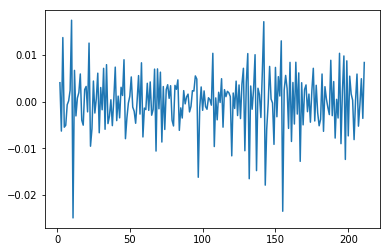

In [69]:
df['Second BMS'] = df['First BMS'] - df['First BMS'].shift(1)
df['Second BMS'].plot()

In [70]:
result = adfuller(df['Second BMS'].dropna())
result

(-12.725535300855263,
 9.620304867309601e-24,
 10,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 -1604.278857987422)

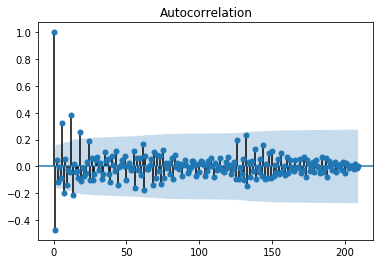

In [71]:
fig_first = plot_acf(df['Second BMS'].dropna())

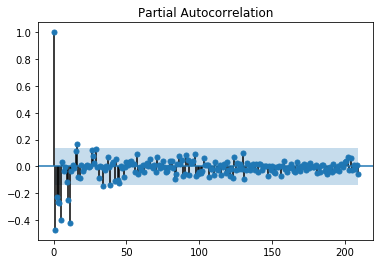

In [72]:
fig_first = plot_pacf(df['Second BMS'].dropna(), method='ywmle')

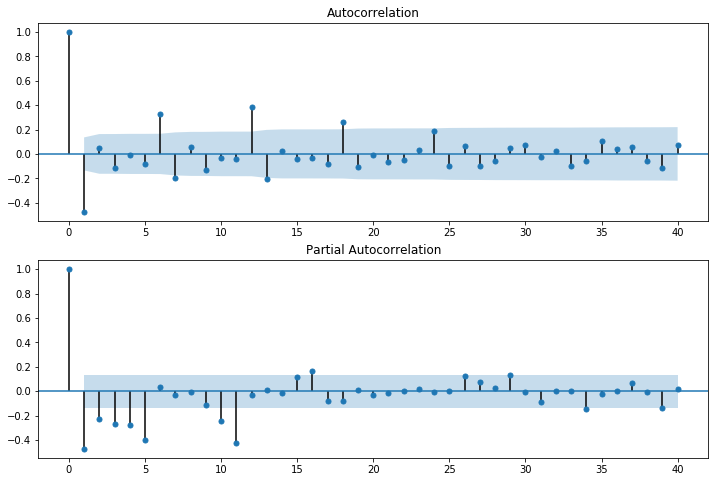

In [74]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Second BMS'].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Second BMS'].dropna(), method='ywmle', lags=40, ax=ax2)

In [87]:
model = ARIMA(df['BMS'].dropna(),order=(1,2,5))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D2.BMS   No. Observations:                  210
Model:                 ARIMA(1, 2, 5)   Log Likelihood                 839.937
Method:                       css-mle   S.D. of innovations              0.004
Date:                Thu, 12 Mar 2020   AIC                          -1663.874
Time:                        16:32:59   BIC                          -1637.097
Sample:                             2   HQIC                         -1653.049
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.738e-06   2.56e-05      0.146      0.884   -4.65e-05    5.39e-05
ar.L1.D2.BMS    -0.0001      0.286     -0.000      1.000      -0.561       0.561
ma.L1.D2.BMS    -1.0356      0.275     -3.768      0.000      -1.574      -0.497
ma.L2.D2.BMS     0.0320      0.290      0.110      0.912      -0.537       0.601
ma.L3.D2.BMS    -0.1576      0.091     -1.736      0.084      -0.335       0.020
ma.L4.D2.BMS     0.0409      0.083      0.491      0.624      -0.122       0.204
ma.L5.D2.BMS     0.2030      0.076      2.655      0.009       0.053       0.353
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1        -7686.5167           +0.0000j         7686.5167            0.5000
MA.1            1.0815           -0.1782j            1.0961           -0.0260
MA.2            1.0815           +0.1782j            1.0961            0.0260
MA.3           -0.2509           -1.4625j            1.4838           -0.2770
MA.4           -0.2509           +1.4625j            1.4838            0.2770
MA.5           -1.8625           -0.0000j            1.8625           -0.5000
-----------------------------------------------------------------------------
"""

In [88]:
model = ARIMA(df['BMS'].dropna(),order=(1,2,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D2.BMS   No. Observations:                  210
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 832.916
Method:                       css-mle   S.D. of innovations              0.005
Date:                Thu, 12 Mar 2020   AIC                          -1657.831
Time:                        16:33:16   BIC                          -1644.443
Sample:                             2   HQIC                         -1652.419
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.125e-06   5.22e-06     -0.407      0.684   -1.24e-05    8.11e-06
ar.L1.D2.BMS     0.0202      0.069      0.291      0.772      -0.116       0.156
ma.L1.D2.BMS    -1.0000      0.018    -54.161      0.000      -1.036      -0.964
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           49.5333           +0.0000j           49.5333            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [90]:
model = ARIMA(df['BMS'].dropna(),order=(2,2,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D2.BMS   No. Observations:                  210
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 832.799
Method:                       css-mle   S.D. of innovations              0.005
Date:                Thu, 12 Mar 2020   AIC                          -1655.597
Time:                        16:33:31   BIC                          -1638.862
Sample:                             2   HQIC                         -1648.832
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.843e-06   6.85e-06     -0.269      0.788   -1.53e-05    1.16e-05
ar.L1.D2.BMS     0.0435      0.073      0.598      0.551      -0.099       0.186
ar.L2.D2.BMS    -0.0210      0.072     -0.292      0.771      -0.162       0.120
ma.L1.D2.BMS    -0.9897      0.053    -18.687      0.000      -1.093      -0.886
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0328           -6.8155j            6.8933           -0.2261
AR.2            1.0328           +6.8155j            6.8933            0.2261
MA.1            1.0104           +0.0000j            1.0104            0.0000
-----------------------------------------------------------------------------
"""

In [93]:
model = ARIMA(df['BMS'].dropna(),order=(3,2,2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D2.BMS   No. Observations:                  210
Model:                 ARIMA(3, 2, 2)   Log Likelihood                 837.013
Method:                       css-mle   S.D. of innovations              0.004
Date:                Thu, 12 Mar 2020   AIC                          -1660.026
Time:                        16:34:23   BIC                          -1636.596
Sample:                             2   HQIC                         -1650.554
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.301e-06   4.78e-06     -0.482      0.631   -1.17e-05    7.07e-06
ar.L1.D2.BMS    -0.7970      0.173     -4.608      0.000      -1.136      -0.458
ar.L2.D2.BMS    -0.0258      0.089     -0.290      0.772      -0.201       0.149
ar.L3.D2.BMS    -0.1364      0.070     -1.950      0.053      -0.273       0.001
ma.L1.D2.BMS    -0.1420      0.157     -0.903      0.368      -0.450       0.166
ma.L2.D2.BMS    -0.8560      0.158     -5.420      0.000      -1.166      -0.546
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0779           -0.0000j            1.0779           -0.5000
AR.2            0.4443           -2.5698j            2.6080           -0.2228
AR.3            0.4443           +2.5698j            2.6080            0.2228
MA.1            1.0011           +0.0000j            1.0011            0.0000
MA.2           -1.1670           +0.0000j            1.1670            0.5000
-----------------------------------------------------------------------------
"""

In [107]:
model = ARIMA(df['BMS'],order=(1,2,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D2.BMS   No. Observations:                  210
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 832.916
Method:                       css-mle   S.D. of innovations              0.005
Date:                Thu, 12 Mar 2020   AIC                          -1657.831
Time:                        16:39:28   BIC                          -1644.443
Sample:                             2   HQIC                         -1652.419
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.125e-06   5.22e-06     -0.407      0.684   -1.24e-05    8.11e-06
ar.L1.D2.BMS     0.0202      0.069      0.291      0.772      -0.116       0.156
ma.L1.D2.BMS    -1.0000      0.018    -54.161      0.000      -1.036      -0.964
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           49.5333           +0.0000j           49.5333            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""